# Coded Solutions to Useful Tutorials (Written and Programmed)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import StringIO

### 2. Bayesian decision theory 

In [7]:
"""Finding posterior values"""

# Unbroken data - w1
u_sx = 20179.5
u_sx2 = 4163531.8
u_med = 202.8
u_n = 100
u_mean = 20179.5 / 100
u_std = np.sqrt((u_sx2 / u_n) - u_mean**2)
 
# Broken data - w2
b_sx = 25368.4
b_sx2 = 6652312.5
b_med = 251.1
b_n = 100
b_mean = 25368.4 / 100
b_std = np.sqrt((b_sx2 / b_n) - b_mean**2)

# Find p(w|x) = p(x|w)p(w) / p(x)
pu = 0.9
pb = 0.1

def normal(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi * std ** 2))) * np.exp(-0.5 * ((x - mean) / std)**2)

px_u = normal(240, u_mean, u_std) 
pb_u = normal(240, b_mean, b_std)

px = px_u * pu + pb_u * pb

pw_u = (px_u * pu) / px
pw_b = (pb_u * pb) / px

print(f"Probability of breaking: {pw_b}, Probability of not breaking: {pw_u}")

Probability of breaking: 0.13311052217324268, Probability of not breaking: 0.8668894778267574


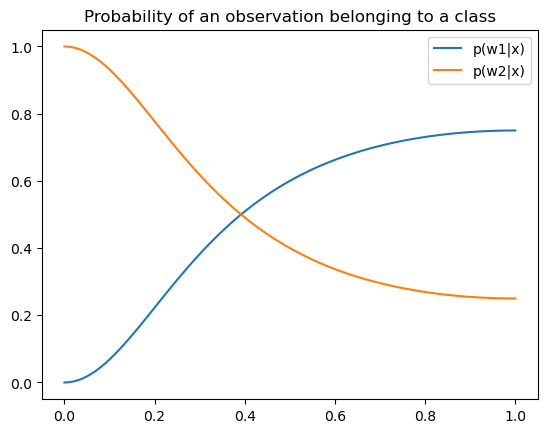

In [ ]:
"""Finding posterior distributions"""

def class_1(x):
    return 1 - np.cos(np.pi * x) 

def class_2(x):
    return 1 

p1 = 0.6
p2 = 0.4

xrange = np.linspace(0, 1, 100)
px_1 = class_1(xrange) 
px_2 = class_2(xrange)

px = px_1 * p1 + px_2 * p2

pw_1 = (px_1 * p1) / px
pw_2 = (px_2 * p2) / px

plt.plot(xrange, pw_1, label="p(w1|x)")
plt.plot(xrange, pw_2, label="p(w2|x)")
plt.legend()
plt.title("Probability of an observation belonging to a class")
plt.show()

### 3. Regression

In [11]:
"""Comparing analytical and numerical gradients"""

def analytical_grad1(x):
    return 4*x**3

def analytical_grad2(x):
    return 2*x

def numerical_grad1(x, step):
    return (((x + step/2)**4 - 1) - ((x - step/2)**4 - 1)) / step

def numerical_grad2(x, step):
    return (((x + step/2)**2) - ((x - step/2)**2)) / step

print(f"Analytical gradient: {analytical_grad1(3)}", f"Numerical gradient: {numerical_grad1(3, 1e-2)}")
print(f"Analytical gradient: {analytical_grad2(3)}", f"Numerical gradient: {numerical_grad2(3, 1e-2)}")

Analytical gradient: 108 Numerical gradient: 108.00029999999765
Analytical gradient: 6 Numerical gradient: 5.999999999999872


In [29]:
"""Find improved constants through gradient descent"""

x1 = np.array([5.3, 2.1, 3.9, 1.8])
x2 = np.array([8.3, 2.8, 5.5, 2.3])
y = np.array([6.2, 5.6, 7.2, 3.4])

# 1st order polynomial: f1(x) = b0 + b1x1 + b2x2
# 2nd order polynomial: f2(x) = b0 + b1x1 + b2x2 + b3x1^2 + b4x2^2 + b5x1x2

b0 = 2
b1 = -1
b2 = 0
step = 0.001
m = len(x1)
steps = 1

def f1(x1, x2, b0, b1, b2):
    return b0 + b1*x1 + b2*x2

# Residual = f1(x) - y
# E2 = s(residual^2)
def residual(x1, x2, y, b0, b1, b2):
    return f1(x1, x2, b0, b1, b2) - y

for _ in range(steps):
    # dE2/db0 = s(2 * residual)
    b0_grad = np.sum(2 * residual(x1, x2, y, b0, b1, b2))
    print(b0_grad)
    
    # dE2/db1 = s(2 * residual * x1)
    b1_grad = np.sum(2 * residual(x1, x2, y, b0, b1, b2) * x1)
    print(b1_grad)

    # dE2/db2 = s(2 * residual * x2)
    b2_grad = np.sum(2 * residual(x1, x2, y, b0, b1, b2) * x2)
    print(b2_grad)

    b0 = b0 - step * b0_grad
    b1 = b1 - step * b1_grad
    b2 = b2 - step * b2_grad

print(f"{b0 = }, {b1 = }, {b2 = }")

-54.99999999999999
-207.14000000000001
-304.44000000000005
b0 = 2.055, b1 = -0.79286, b2 = 0.30444000000000004


### Linear discriminants

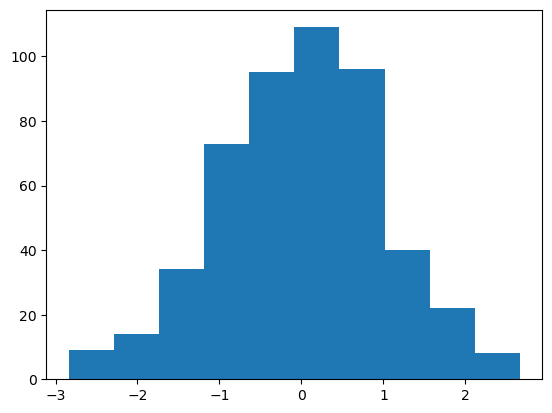

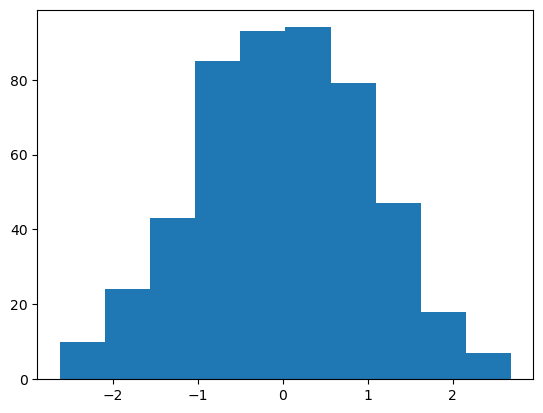

In [7]:
"""Scaling data to have mean 0 and standard deviation 1"""

def safe_read_csv(url): 
    response = requests.get(url)
    csv_data = StringIO(response.text)
    return pd.read_csv(csv_data)

df = safe_read_csv('https://mech-learn.imperial.ac.uk/ml/tensile_strength.csv')
t = np.array(df.iloc[:, 0])
s = np.array(df.iloc[:, 1])

t_mean = np.mean(t)
s_mean = np.mean(s)
t_std = np.std(t)
s_std = np.std(s)

t_scale = (t - t_mean) / t_std
s_scale = (s - s_mean) / s_std

plt.hist(s_scale)
plt.show()

plt.hist(t_scale)
plt.show()

1000000 (2, 1) (1000000, 2) (1000000, 1)


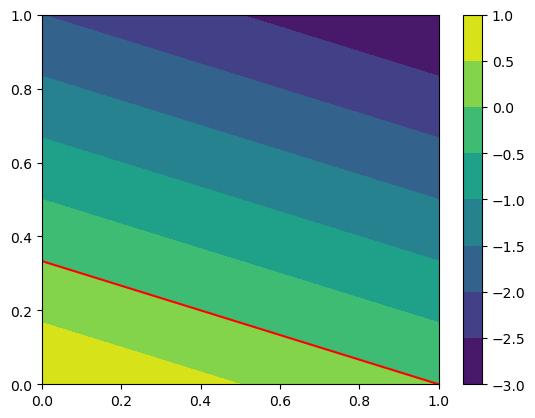

In [22]:
"""Plotting linear discriminant function in 2D with decision boundary"""

# Linear discriminant equation: g(x) = w^T * x + w0 = w1x1 + w2x2 + w0 in 2D
w = np.array([-1, -3]).reshape(2, 1)
w0 = 1

def gen_sample_grid(npx, npy, lower, upper): # Create meshgrid for 2D contour plot
    x1line = np.linspace(lower, upper, npx) # Create a line of x1 values
    x2line = np.linspace(lower, upper, npy) # Create a line of x2 values
    x1grid, x2grid = np.meshgrid(x1line, x2line) # Create 2 grids - x1grid repeats x1line in each row, x2grid repeats x2line in each column
    Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T # Create a meshgrid - concatenate x1grid and x2grid and reshape so that each row is a point in 2D space
    return Xgrid, x1line, x2line

Xgrid, x1line, x2line = gen_sample_grid(100, 100, 0, 1)

g = np.matmul(w.T, Xgrid.T).T + w0
m = len(Xgrid)
print(m, w.shape, Xgrid.shape, g.shape) # Check shapes - should be (2, 1), (m, 2), (m, 1)

# Rearrange g(x) = 0 for x2 decision boundary plotting
x2 = -(w[0] * x1line + w0) / w[1]

plt.contourf(x1line, x2line, g.reshape(len(x1line), len(x2line))) # Plot contour plot of g(x) - shape must be (x1, x2)
plt.colorbar()
plt.plot(x1line, x2, c="red")
plt.show()

(1, 3) (3, 10000)
(5, 10000)


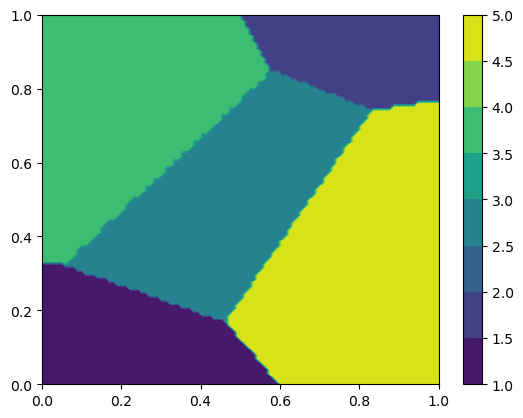

In [3]:
"""Plotting classification areas"""

# General form of linear discriminant function: g(x) = a^T * y

a1 = np.array([[1.3, -1, -3]]).T
a2 = np.array([[-2, 1, 2]]).T
a3 = np.array([[0.3, 0.1, -0.1]]).T
a4 = np.array([[0, -1, 1]]).T
a5 = np.array([[-0.2, 1.5, -1]]).T

def gen_sample_grid(npx, npy, lower, upper): # Create meshgrid for 2D contour plot
    x1line = np.linspace(lower, upper, npx) # Create a line of x1 values
    x2line = np.linspace(lower, upper, npy) # Create a line of x2 values
    x1grid, x2grid = np.meshgrid(x1line, x2line) # Create 2 grids - x1grid repeats x1line in each row, x2grid repeats x2line in each column
    Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T # Create a meshgrid - concatenate x1grid and x2grid and reshape so that each row is a point in 2D space
    return Xgrid, x1line, x2line

Xgrid, x1line, x2line = gen_sample_grid(100, 100, 0, 1)

# y = (1, x1, x2).T - 1 value represents bias
Ygrid = np.concatenate([np.ones((len(Xgrid), 1)), Xgrid], axis=1).T # Each column is 1, x1, x2

print(a1.T.shape, Ygrid.shape) # Check for same inner dimensions for matrix multiplication
g1 = np.matmul(a1.T, Ygrid) # Evaluate the linear discriminant function for each point in the grid
g2 = np.matmul(a2.T, Ygrid)
g3 = np.matmul(a3.T, Ygrid)
g4 = np.matmul(a4.T, Ygrid)
g5 = np.matmul(a5.T, Ygrid)

g_combined = np.concatenate([g1, g2, g3, g4, g5], axis=0) # Each row represents a different g(x) for each a
print(g_combined.shape) 

decision = np.argmax(g_combined, axis=0) + 1 # For each column (contains the evaluations of g(x) for each a), find the index of the maximum value and add 1 to represent a1 to a5
decision = decision.reshape(len(x1line), len(x2line)) # Reshape to 2D grid

plt.contourf(x1line, x2line, decision) # Plot contour plot of g(x) - shape must be (x1, x2)
plt.colorbar()
plt.show()

(1, 4) (4, 250000)
(5, 250000)


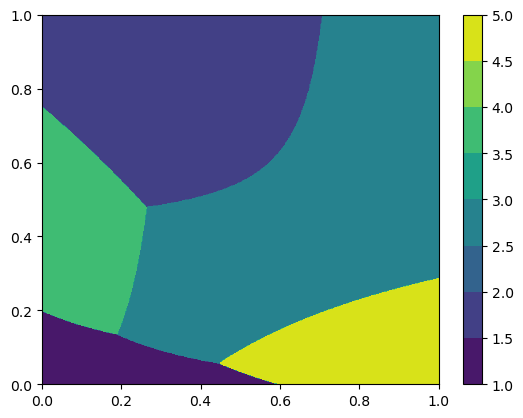

In [15]:
"""Plotting classification areas for higher order functions"""

# Higher order weights
a1 = np.array([[1.3, -1, -3, -10]]).T
a2 = np.array([[-1,1.5,3,-1]]).T
a3 = np.array([[0.4, -0.1, -0.1, 3]]).T
a4 = np.array([[0.5, -1, 1, -0.1]]).T
a5 = np.array([[-0.2, 1.5, -1, 0.4]]).T

def gen_sample_grid(npx, npy, lower, upper): # Create meshgrid for 2D contour plot
    x1line = np.linspace(lower, upper, npx) # Create a line of x1 values
    x2line = np.linspace(lower, upper, npy) # Create a line of x2 values
    x1grid, x2grid = np.meshgrid(x1line, x2line) # Create 2 grids - x1grid repeats x1line in each row, x2grid repeats x2line in each column
    Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T # Create a meshgrid - concatenate x1grid and x2grid and reshape so that each row is a point in 2D space
    return Xgrid, x1line, x2line

Xgrid, x1line, x2line = gen_sample_grid(500, 500, 0, 1)

# new_y = (1, x1, x2, x1x2) - 1 value represents bias
x1x2 = (Xgrid[:, 0] * Xgrid[:, 1]).reshape(len(Xgrid), 1) # Reshaped to a 2D array from 1D
new_Ygrid = np.concatenate([np.ones((len(Xgrid), 1)), Xgrid, x1x2], axis=1).T # Each column is 1, x1, x2, x1x2

print(a1.T.shape, new_Ygrid.shape) # Check for same inner dimensions for matrix multiplication
g1 = np.matmul(a1.T, new_Ygrid) # Evaluate the linear discriminant function for each point in the grid
g2 = np.matmul(a2.T, new_Ygrid)
g3 = np.matmul(a3.T, new_Ygrid)
g4 = np.matmul(a4.T, new_Ygrid)
g5 = np.matmul(a5.T, new_Ygrid)

g_combined = np.concatenate([g1, g2, g3, g4, g5], axis=0) # Each row represents a different g(x) for each a
print(g_combined.shape)

decision = np.argmax(g_combined, axis=0) + 1 # For each column (contains the evaluations of g(x) for each a), find the index of the maximum value and add 1 to represent a1 to a5
decision = decision.reshape(len(x1line), len(x2line)) # Reshape to 2D grid

plt.contourf(x1line, x2line, decision) # Plot contour plot of g(x) - shape must be (x1, x2)
plt.colorbar()
plt.show()

### SVMs

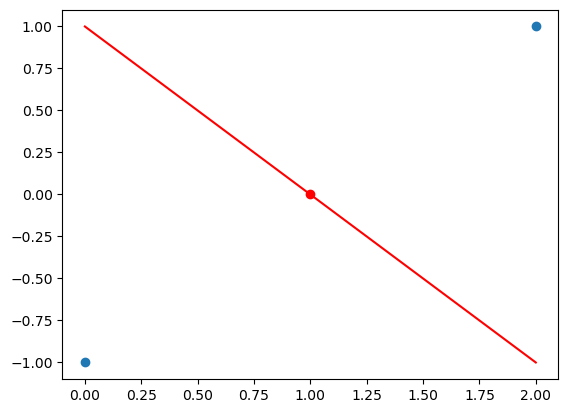

In [47]:
"""Find the linear discriminant form of the decision boundary from 2 support vectors"""

sv1 = np.array([2, 1])
sv2 = np.array([0, -1])

x1 = np.array([sv1[0], sv2[0]])
x2 = np.array([sv1[1], sv2[1]])

plt.scatter(x1, x2)

# w is perpendicular to the decision boundary which is the same as the line connecting the support vectors
w = sv2 - sv1

# Midpoint is on the decision boundary, so g(x) = w^T * x + w0 = 0
mid = (sv1 + sv2) / 2
plt.scatter(mid[0], mid[1], c="red")
w0 = -np.matmul(w.T, mid)

# Rearrange g(x) = 0 for x2 decision boundary plotting
xrange = np.linspace(0, 2, 100)
x2plot = -(w[0] * xrange + w0) / w[1]

plt.plot(xrange, x2plot, c="red")
plt.show()

[-1.]


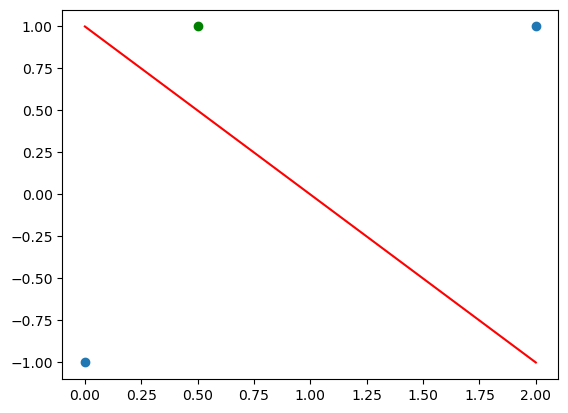

In [ ]:
"""Calculate the epsilon for a soft-margin SVM (WIP)"""

sv1 = np.array([2, 1])
sv2 = np.array([0, -1])

x1 = np.array([sv1[0], sv2[0]])
x2 = np.array([sv1[1], sv2[1]])
plt.scatter(x1, x2)

w = np.array([-2, -2])
w0 = 2

# Rearrange g(x) = 0 for x2 decision boundary plotting
xrange = np.linspace(0, 2, 100)
x2 = -(w[0] * xrange + w0) / w[1]

plt.plot(xrange, x2, c="red")

# Margin defined as min(yi(w.T * xi + w0))
y1 = 0
y2 = 1
yi = np.array([y1, y2])
xi = np.array([sv1, sv2])
w = w.reshape(2, 1)

tp = np.array([0.5, 1]) # Should be classified as 0
plt.scatter(tp[0], tp[1], c="green")
gtp = np.matmul(w.T, tp) + w0
print(gtp)

# epsilon = distance from boundary / margin






### Neural networks

### Non-parametric methods

In [7]:
"""Check if PDF is valid"""

def phi(x):
    result = 0.75 * (1-x**2)
    return np.where(np.abs(x) < 1, result, 0)

x = np.linspace(-1, 1, 100)
y = phi(x)
integral = np.trapz(y, x)
print(integral) # Valid pdf if integral = 1 (or close to accounting for integration error)

0.9998979695949394


### Nonmetric methods

In [8]:
"""Gini impurity calculation"""

node = 10 # Number of points that reach the node
cat1 = 1 # Number of points that reach category 1
cat2 = 6
cat3 = 3

gini = 1 - (cat1 / node)**2 - (cat2 / node)**2 - (cat3 / node)**2 # Gini impurity = 1 - sum(p^2)
print(gini)

0.54


### Unsupervised learning

In [ ]:
"""Expressing points from orthogonal and non-orthongonal vectors"""

target = np.array([1, 3])
# Non-orthogonal vectors
v1 = np.array([1, 0])
v2 = np.array([0.2, -0.8])

vect = np.array([v1, v2]).T
w1, w2 = np.linalg.solve(vect, target)
# target = w1 * v1 + w2 * v2

# Orthogonal vectors
ov1 = np.array([0.8, 0.2])
ovect = np.array([ov1, v2]).T

ow1, ow2 = np.linalg.solve(ovect, target)

In [ ]:
"""Checking if vectors can be principal components"""

v1 = np.array([0.5, 0.5, 0, 0.4])
v2 = np.array([0.2, 0.1, -0.2, 0.2])
v3 = np.array([-0.3, 0, -0.5, -0.1])
print(np.where((np.dot(v1, v2) == 0) & (np.dot(v1, v3) == 0) & (np.dot(v2, v3) == 0), "Possible PCs", "Not PCs")) # Check if dot product is 0 - can be PCs

y = 1.87x + -1.11


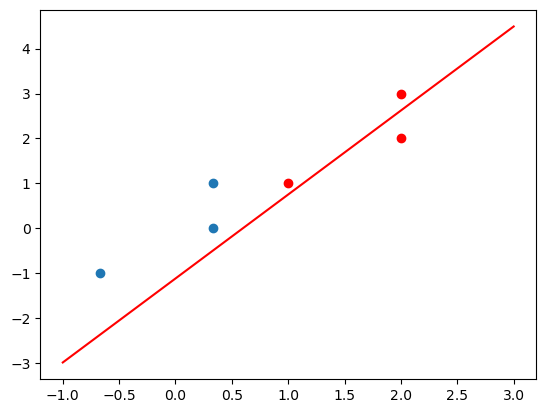

In [79]:
"""Find the equation of the 1st principal component"""

p1 = np.array([1, 1])
p2 = np.array([2, 2])
p3 = np.array([2, 3])

x1 = np.array([p1[0], p2[0], p3[0]])
x2 = np.array([p1[1], p2[1], p3[1]])
X = np.array([x1, x2]).T # Data matrix - each row is a point in 2D space
plt.scatter(X[:, 0], X[:, 1], c="red") # Plot original points

mu = np.array([np.mean(x1), np.mean(x2)]) # Subtract the mean from each point for PCA
X = X - mu

plt.scatter(X[:, 0], X[:, 1]) # Plot mean-centered points

C = np.cov(X, rowvar=False) # Covariance matrix calculated by X.T * X
evals, evecs = np.linalg.eig(C)
# Evals found by solving det(C - lambda * I) = 0
# Evecs found by solving (C - lambda * I) * x = 0 for each lambda

index = np.argmax(evals) # Find the index of the largest eigenvalue
pc = evecs[index] # Principal component is the eigenvector corresponding to the largest eigenvalue

m = -pc[1] / pc[0] # Slope of the principal component
# y = mx but x and y have the mean subtracted
# y - mu[1] = m(x - mu[0])
# y = mx + (mu[1] - m * mu[0])
c = mu[1] - m * mu[0]
print(f"y = {m:.2f}x + {c:.2f}")

y = lambda x: m * x + c
xrange = np.linspace(-1, 3, 100)
plt.plot(xrange, y(xrange), c="red") # Plot the first principal component

In [81]:
"""Simple k-means clustering with a 1 node neural network"""

m1 = np.array([3, 5])
m2 = np.array([7, 2])

# Represent k-means clustering as a linear discriminant function

w = m2 - m1
# g(x) = w^T * x + w0 = 0 for points on the decision boundary
mid = (m1 + m2) / 2
w0 = -np.matmul(w.T, mid)

# NN node has input x1 weight w[0], input x2 weight w[1], bias w0
# Activation function is sign(): - 1 if negative, 1 if positive

[ 4 -3] -9.5
